In [1]:
import numpy as np

In [7]:
# sample X from a normal distribution with mean 0 and variance 1
X = np.random.normal(0, 1, 2000)

# sample Y from a laplace distribution with mean 0 and variance 1
Y = np.random.laplace(0, 1, 2000)



In [8]:
def pdist2sq(X,Y):
    # X: N x D
    # Y: M x D

    # First calculate -2 * X * Y^T
    C = -2 * np.dot(X, Y.T)

    # Calculate the sum of squares term (N x 1)
    nx = np.sum(np.square(X), axis=1)
    ny = np.sum(np.square(Y), axis=1)

    pairwise_dist_sq = C + nx[:, np.newaxis] + ny
    return pairwise_dist_sq

In [15]:
def mmd_rbf(X, Y):
    n = X.shape[0]
    m = Y.shape[0]
    sigma = 0.5
    K_XX = np.exp(-pdist2sq(X, X) / (2 * sigma**2))
    K_YY = np.exp(-pdist2sq(Y, Y) / (2 * sigma**2))
    K_XY = np.exp(-pdist2sq(X, Y) / (2 * sigma**2))

    mmd = np.sum(K_XX) / (n * (n - 1)) + np.sum(K_YY) / (m * (m - 1)) - 2 * np.sum(K_XY) / (n * m)
    return mmd


min_X_Y = min(np.min(X), np.min(Y))
max_X_Y = max(np.max(X), np.max(Y))
t = np.linspace(min_X_Y, max_X_Y, 1000)
t = t.reshape(-1, 1)

# calculate K_XT and KYT for each t
n = X.shape[0]
m = Y.shape[0]
sigma = 0.5
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
K_XT = np.exp(-pdist2sq(X, t) / (sigma**2))
K_YT = np.exp(-pdist2sq(Y, t) / (sigma**2))
K_X_T_mean = np.mean(K_XT, axis=0)
K_Y_T_mean = np.mean(K_YT, axis=0)
f = K_X_T_mean - K_Y_T_mean
print(f.shape)

print(mmd_rbf(X, Y))
print(np.mean(f))



(1000,)
0.00685109209400192
3.538834886950487e-05


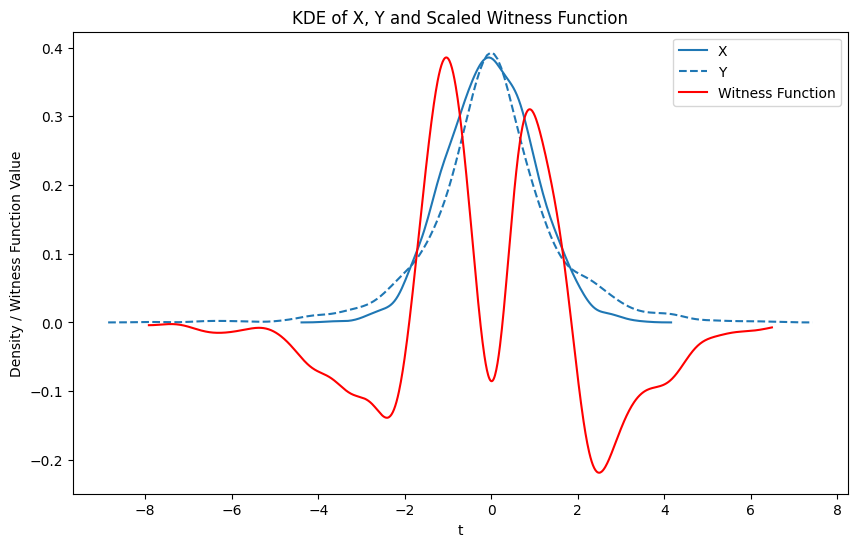

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming X, Y, t, and f are already computed
# X and Y: Input data points
# t: Evaluation points for the witness function (from np.linspace)
# f: Witness function values at points t

plt.figure(figsize=(10, 6))

# Compute the KDE for X and Y
kde_X = sns.kdeplot(X, label='X', linestyle='-', color='blue')
kde_Y = sns.kdeplot(Y, label='Y', linestyle='--', color='green')

# Get the max density of KDEs to scale the witness function
X_density_max = np.max(kde_X.get_lines()[0].get_ydata())
Y_density_max = np.max(kde_Y.get_lines()[0].get_ydata())
density_max = max(X_density_max, Y_density_max)

# Scale the witness function based on the maximum density of X and Y
witness_scale_factor = density_max / np.max(np.abs(f))
scaled_f = f * witness_scale_factor

# Plot the witness function
plt.plot(t, scaled_f, label='Witness Function', color='red')

# Add labels, title, and legend
plt.title("KDE of X, Y and Scaled Witness Function")
plt.xlabel("t")
plt.ylabel("Density / Witness Function Value")
plt.legend()

# Show the plot
plt.show()
